# Demo of CNMF

This notebook demonstrates how to use CMFpy, a package that implements Convolutive Matrix (CMF) in Python. The goal of CMF is to minimize the objective

$$ J = \| \hat{X} - X \| $$

where $X$ is a data matrix and $\hat{X}$ is an estimate given by

$$ \hat{X} = W * \mathcal{H} = \sum_{l=1}^{L} W_{::l} H_l $$

where $W$ is an $N \times K \times L$ tensor and $H_l$ is the matrix $\mathcal{H}$ with columns shifted right $l$ times and padded with zeros on the left.

In [1]:
import matplotlib.pyplot as plt

from numpy.linalg import norm

from cmfpy import CMF  # CMF model
# from cmfpy.utils import sort_neurons, plot_H_components  # Helper functions for visual
from cmfpy.datasets import Synthetic  # Synthetic dataset

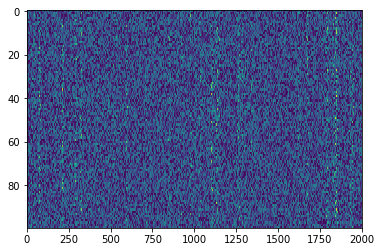

In [2]:
# Generate data
synth_dataset = Synthetic(n_components=3,
                          n_units=100,
                          n_lags=20,
                          n_timebins=2000,
                          H_sparsity=.99,
                          noise_scale=.5,
                          seed=1)

data = synth_dataset.generate()
plt.imshow(data, aspect='auto')
plt.show()

In [3]:
# Fit model
model = CMF(n_components=3,
            maxlag=20,
            method='mult',
            max_iter=500,
            tol=1e-2,
            verbose=True)
model.fit(data);
print("Converged: ", model.info_)

Converged:  True


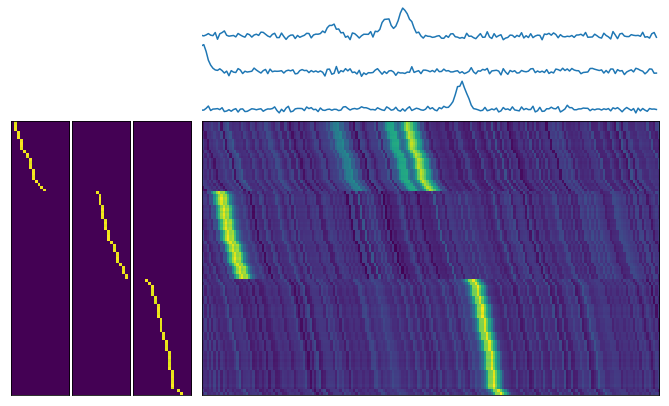

In [4]:
# plot model prediction
model.plot(tmin=200, tmax=400);

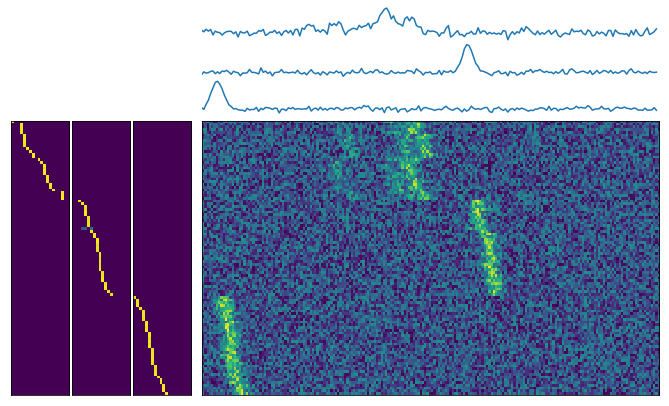

In [6]:
# Plot raw data
model.plot(data, tmin=200, tmax=400, sort=True);

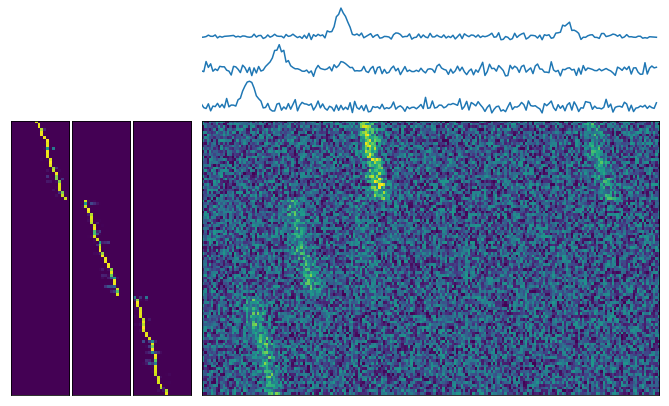

In [7]:
# Plot raw data after lexographic sorting
model.plot(data, tmin=0, tmax=200, sort=True);